# CLIMATE DATA DE BILT

Bu notebook, Hollanda'daki 1800-2014 yılları arasındaki iklim normallerinin kaydedildiği bir veri seti kullanılarak iklim verilerinin birbiriyle ilişkisini analiz etmek ve bir tahmin modeli gelistirmek amacıyla **veri işleme** ve **Python uygulamaları** üzerine bir çalışma içermektedir.

##### Bu notebook spesifik olarak Data Analysis kısmına yoğunlaşmaktadır. Feature Engineering ve diğer adımlar başka notebooklarda yapılacaktır.

## Data Analysis

In [6]:
import pandas as pd
import requests
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [10]:
# Data Preprocessing notebookunda temizlenmiş veri setinin bulunduğu Excel dosyasını içe aktarma
file_path = "ClimateDeBilt_Preprocessed.xlsx"
df = pd.read_excel(file_path)

In [12]:
#Data setimin içindeki veri tiplerini kontrol ediyorum 

df.dtypes

Year                         int64
YearlyAvgTemp              float64
WinterAvgTemp              float64
WinterAvgMinTemp           float64
SummerAvgTemp              float64
SummerAvgMaxTemp           float64
SunlessDays                  int64
DaysWithPrecipitation        int64
DaysWithFog                  int64
IceDays                      int64
FrostDays                    int64
SnowDays                     int64
HoursOfSunshine              int64
SummeryDays                  int64
TropicalDays                 int64
DryDays                      int64
RelativeHumidity             int64
QuantityOfPrecipitation      int64
Evaporation                  int64
HeatingDegreeDays            int64
dtype: object

In [14]:
# Veri çerçevesindeki eksik veri olup olmadığını kontrol ediyorum
missing_data = df.isnull().sum()

# Sonuçları görüntülüyorum
print(missing_data)

Year                       0
YearlyAvgTemp              0
WinterAvgTemp              0
WinterAvgMinTemp           0
SummerAvgTemp              0
SummerAvgMaxTemp           0
SunlessDays                0
DaysWithPrecipitation      0
DaysWithFog                0
IceDays                    0
FrostDays                  0
SnowDays                   0
HoursOfSunshine            0
SummeryDays                0
TropicalDays               0
DryDays                    0
RelativeHumidity           0
QuantityOfPrecipitation    0
Evaporation                0
HeatingDegreeDays          0
dtype: int64


## DATA VISUALIZATION

Bu adımda değişkenlerin birbiri ile ilişkisini anlamak için öncelikle veri görselleştirmesi yapılacak.

### 1. Adım: Değişkenlerin açıklanması ve kategorize edilmesi

#### Sıcaklık Bazındaki Değişkenler

Yearly Average Temperature: Yıllık ortalama sıcaklık verisi

Winter Average Temperature: Kış mevsimi ortalama sıcaklık verisi

Summer Average Temperature: Yaz mevsimi ortalama sıcaklık verisi

Winter Average Minimum Temperature: Kış mevsimi ortalama minimum sıcaklık verisi

Summer Average Temperature: Yaz mevsimi ortalama maximum sıcaklık verisi

#### Zaman (Gün, saat) Bazındaki Değişkenler

Bu değişkenler Hollanda ikliminin (sık yağışlı, serin ve yüksek nemli) karakteristiği dolayısıyla hava olaylarının sıklığı ve gelişme sırası göz önünde bulundurularak sıralandırılmıştır. 

Sunless Days: Güneş ışığının olmadığı, bulutlu ve kapalı havanın hakim olduğu günler. Yağışı tetikler.

Days with Precipitation: Yağışlı günler. 

Days with Fog: Nemli ve genellikle soğuk hava koşullarında oluşan sisli günler. Yağış sonrasında veya beraberinde görülebilir. 

Ice Days: Buzlu günler. Gündüz sıcaklıklarının sıfırın altına düştüğü günler.

Frost Days: Donlu günler. Gece sıcaklıklarının sıfırın altına düştüğü günler. Buzlu günler ile örtüşebilir, gece soğukluğu daha belirgindir.

Snow Days: Kar yağışı olan günler. Genellikle buzlu ve donlu günlerden sonra ya da bu günlerle birlikte görülebilir. 

Hours of Sunshine: Güneşli saatler. Günün sıcaklığı ile ilgili bir gösterge olabilir ancak doğrudan bir 'sıcak gün' tanımı oluşturmaz. Güneşin gün içerisinde ne kadar göründüğünü belirtir. 

Summery Days: Sıcak günler.

Tropical Days: Aşırı sıcak ve nemli günler.

Dry Days: Kurak, yağışsız havanın hakim olduğu günler.

#### Diğer kategorideki değişkenler

Relative Humidity (%): Bağıl Nem. Havanın ne kadar su buharı taşıdığını ve yağış olasılığını gösterir.

Quantiy of Precipitation: Yağış miktarı. Bağıl nemin yüksekliği ile doğrudan ilişkili. Bu veri setindeki birimi bilinmiyor.

Evaporation: Buharlaşma oranı. Nem ve yağış oranı ile ters orantılıdır. Eğer hava nemliyse, buharlaşma oranı düşer çünkü hava zaten su buharına doygundur. 

#### Gün-Derece (Degree Days)

Gün derece (Degree Days): Binaların ısıtma veya soğutma ihtiyacını ölçmek için kullanılan bir ölçüm. Hava sıcaklıklarının referans sıcaklıktan ne kadar saptığını gösterir.

Heating Degree Days: Isıtma gün derecesi. Sıcaklıklar referans sıcaklığın altında olduğunda, mekanların ısıtılması gerektiğini gösterir.

Cooling Degree Days: Soğutma gün derecesi. Sıcaklıklar referans sıcaklığın üstünde olduğunda, mekanların soğutulması gerektiğini gösterir.

### 2. Adım: Korelasyon Matrisi - Heatmap

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

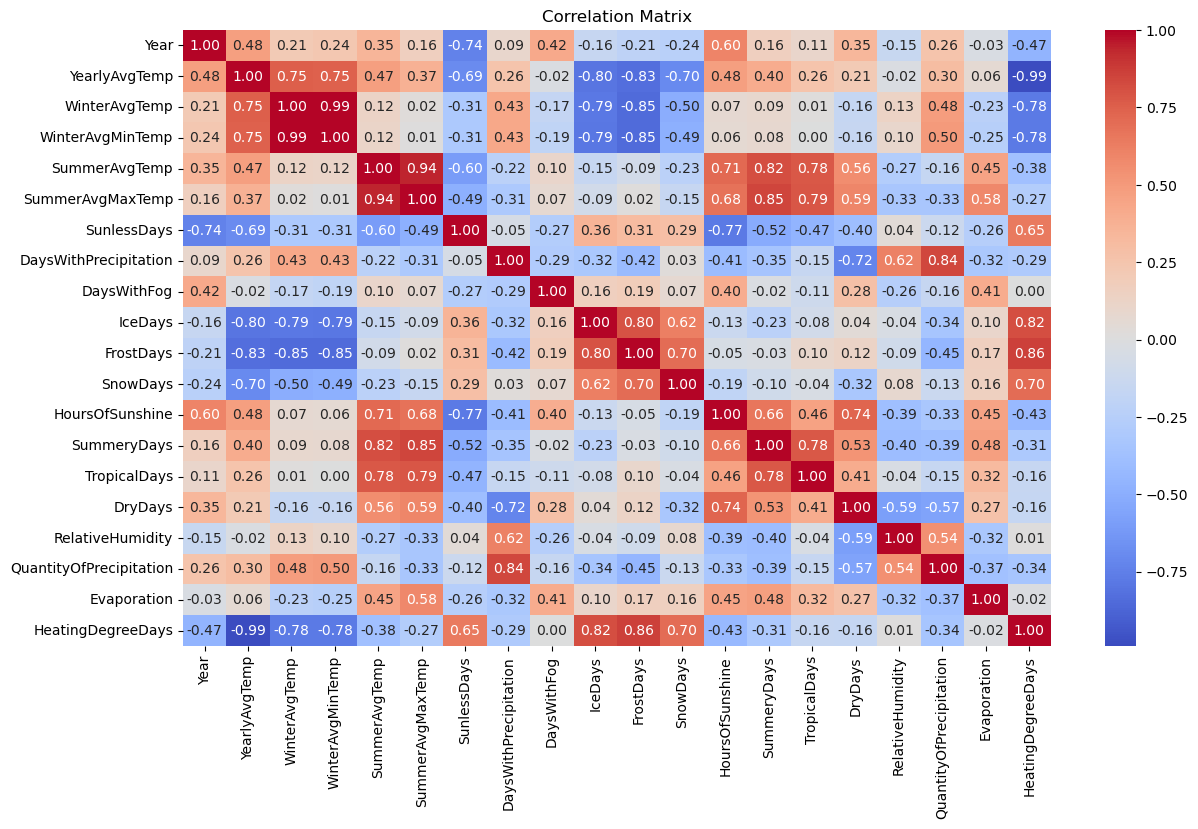

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 8))  # Genişlik ve yükseklik
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 3. Adım: Korelasyonları Yorumlama

#### Correlation matrixindeki verilere göre önemli çıkarımlar

Korelasyonun Gücü ve Yönü: Katsayının büyüklüğü ilişkinin gücünü, işareti ise ilişkinin yönünü (pozitif ya da negatif) ifade eder. Veri setindeki değişkenler arası ilişkiyi daha iyi açıklamak için aşağıdaki tabloyu referans alabiliriz.

In [24]:

# Korelasyon değerleri ve açıklamaları için bir tablo oluşturuyorum
data = {
    "Korelasyon Katsayısı": [
        "r = 1",
        "0.7 ≤ r < 1",
        "0.3 ≤ r < 0.7",
        "0 < r < 0.3",
        "r = 0",
        "-0.3 < r < 0",
        "-0.7 < r ≤ -0.3",
        "-1 < r ≤ -0.7",
        "r = -1"
    ],
    "İlişki Gücü": [
        "Mükemmel Pozitif İlişki",
        "Güçlü Pozitif İlişki",
        "Orta Düzey Pozitif İlişki",
        "Zayıf Pozitif İlişki",
        "İlişki Yok",
        "Zayıf Negatif İlişki",
        "Orta Düzey Negatif İlişki",
        "Güçlü Negatif İlişki",
        "Mükemmel Negatif İlişki"
    ],
    "Yorum": [
        "Doğrusal ilişki maksimum pozitif.",
        "Değişkenler arasında belirgin bir pozitif bağ.",
        "İlişki var ama çok güçlü değil.",
        "Zayıf doğrusal ilişki.",
        "Doğrusal bir bağlantı bulunmuyor.",
        "Zayıf ters ilişki.",
        "İlişki var ama çok güçlü değil.",
        "Belirgin bir ters ilişki.",
        "Doğrusal ilişki maksimum negatif."
    ]
}

# Pandas DataFrame oluşturuyoruz
df = pd.DataFrame(data)

# Tabloyu daha estetik gösterme

from tabulate import tabulate

# Tabloyu yazdırma
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))



╒════════════════════════╤═══════════════════════════╤════════════════════════════════════════════════╕
│ Korelasyon Katsayısı   │ İlişki Gücü               │ Yorum                                          │
╞════════════════════════╪═══════════════════════════╪════════════════════════════════════════════════╡
│ r = 1                  │ Mükemmel Pozitif İlişki   │ Doğrusal ilişki maksimum pozitif.              │
├────────────────────────┼───────────────────────────┼────────────────────────────────────────────────┤
│ 0.7 ≤ r < 1            │ Güçlü Pozitif İlişki      │ Değişkenler arasında belirgin bir pozitif bağ. │
├────────────────────────┼───────────────────────────┼────────────────────────────────────────────────┤
│ 0.3 ≤ r < 0.7          │ Orta Düzey Pozitif İlişki │ İlişki var ama çok güçlü değil.                │
├────────────────────────┼───────────────────────────┼────────────────────────────────────────────────┤
│ 0 < r < 0.3            │ Zayıf Pozitif İlişki      │ Zayıf doğ

### Değişkenlerin birbiriyle ilişkilerinin analizi

### Iklim krizinin etkilerine dair bir bakış açısı: Yıllar ile diğer değişkenlerin ilişkisi

In [28]:
import pandas as pd
from tabulate import tabulate

# Year ve diğer değişkenler arasındaki korelasyon analizi
Year_corr = correlation_matrix["Year"].drop("Year")  # Yıllar ve diğer değişkenler

# Korelasyon aralıklarını belirleme
correlation_categories = {
    "0.7 ≤ r < 1": (0.70, 1.00),
    "0.3 ≤ r < 0.7": (0.30, 0.70),
    "0 < r < 0.3": (0, 0.30),
    "-0.3 < r < 0": (-0.30, 0),
    "-0.7 < r ≤ -0.3": (-0.70, -0.30),
    "-1 < r ≤ -0.7": (-1.0, -0.70)
}

# Sonuçları kaydedeceğimiz bir sözlük hazırlama
category_results = {key: [] for key in correlation_categories.keys()}

# Korelasyonları sınıflara ayırma
for var, corr_value in Year_corr.items():
    for category, (lower, upper) in correlation_categories.items():
        if lower <= corr_value < upper:  # Aralıklara göre yerleştirme
            category_results[category].append((var, corr_value))

# Kategorileri düzenleme ve değişkenleri sıralama
sorted_results = {
    cat: sorted(vars, key=lambda x: x[1], reverse=True) for cat, vars in category_results.items()
}

# Tabloyu alt alta sıralamak ve uzun satırları kısaltmak için düzenleme
result_table = pd.DataFrame.from_dict(
    {
        cat: [
            "\n".join([f"{var} ({corr_value:.2f})" for var, corr_value in vars]) if vars else "-"
        ]
        for cat, vars in sorted_results.items()
    },
    orient="index",
    columns=["Variables"]
)

# Tabloyu yazdırma
print(tabulate(result_table, headers="keys", tablefmt="fancy_grid"))

╒═════════════════╤════════════════════════════════╕
│                 │ Variables                      │
╞═════════════════╪════════════════════════════════╡
│ 0.7 ≤ r < 1     │ -                              │
├─────────────────┼────────────────────────────────┤
│ 0.3 ≤ r < 0.7   │ HoursOfSunshine (0.60)         │
│                 │ YearlyAvgTemp (0.48)           │
│                 │ DaysWithFog (0.42)             │
│                 │ SummerAvgTemp (0.35)           │
│                 │ DryDays (0.35)                 │
├─────────────────┼────────────────────────────────┤
│ 0 < r < 0.3     │ QuantityOfPrecipitation (0.26) │
│                 │ WinterAvgMinTemp (0.24)        │
│                 │ WinterAvgTemp (0.21)           │
│                 │ SummeryDays (0.16)             │
│                 │ SummerAvgMaxTemp (0.16)        │
│                 │ TropicalDays (0.11)            │
│                 │ DaysWithPrecipitation (0.09)   │
├─────────────────┼───────────────────────────

#### Yıllar ile diğer değişkenlerin korelasyonuna dair yorumlar: 

Orta düzey lineer ilişki: Hours of Sunshine, Yearly Average Temperature, Summer Average Temperature, Dry Days

##### Yorum: Günümüze yaklaştıkça Hollanda'da güneşli saatlerin, yıllık sıcaklıkların, yağmursuz günlerin artması iklim krizinin etkilerini açıkça göstermektedir. 

Orta düzey ters ilişki: Heating Degree Days 

Güçlü ters ilişki: Sunless Days

##### Yorum: Günümüze yaklaştıkça HDD (binaların enerji ihtiyacının) ve güneşsiz günlerin azalması yine iklim krizinin etkileriyle örtüşmekte.


### Iklim krizinin etkilerine dair bir bakış açısı: Yıllık ortalama sıcaklıklar

In [32]:
import pandas as pd
from tabulate import tabulate

# Yearly Average Temperature ve diğer değişkenler arasındaki korelasyon analizi
YearlyAvgTemp_corr = correlation_matrix["YearlyAvgTemp"].drop("YearlyAvgTemp")  # Yıllık ortalama sıcaklıklar ile diğer değişkenler

# Korelasyon aralıklarını belirleme
correlation_categories = {
    "0.7 ≤ r < 1": (0.70, 1.00),
    "0.3 ≤ r < 0.7": (0.30, 0.70),
    "0 < r < 0.3": (0, 0.30),
    "-0.3 < r < 0": (-0.30, 0),
    "-0.7 < r ≤ -0.3": (-0.70, -0.30),
    "-1 < r ≤ -0.7": (-1.0, -0.70)
}

# Sonuçları kaydedeceğimiz bir sözlük hazırlama
category_results = {key: [] for key in correlation_categories.keys()}

# Korelasyonları sınıflara ayırma
for var, corr_value in YearlyAvgTemp_corr.items():
    for category, (lower, upper) in correlation_categories.items():
        if lower <= corr_value < upper:  # Aralıklara göre yerleştirme
            category_results[category].append((var, corr_value))

# Kategorileri düzenleme ve değişkenleri sıralama
sorted_results = {
    cat: sorted(vars, key=lambda x: x[1], reverse=True) for cat, vars in category_results.items()
}

# Tabloyu alt alta sıralamak ve uzun satırları kısaltmak için düzenleme
result_table = pd.DataFrame.from_dict(
    {
        cat: [
            "\n".join([f"{var} ({corr_value:.2f})" for var, corr_value in vars]) if vars else "-"
        ]
        for cat, vars in sorted_results.items()
    },
    orient="index",
    columns=["Variables"]
)

# Tabloyu yazdırma
print(tabulate(result_table, headers="keys", tablefmt="fancy_grid"))

╒═════════════════╤════════════════════════════════╕
│                 │ Variables                      │
╞═════════════════╪════════════════════════════════╡
│ 0.7 ≤ r < 1     │ WinterAvgTemp (0.75)           │
│                 │ WinterAvgMinTemp (0.75)        │
├─────────────────┼────────────────────────────────┤
│ 0.3 ≤ r < 0.7   │ Year (0.48)                    │
│                 │ HoursOfSunshine (0.48)         │
│                 │ SummerAvgTemp (0.47)           │
│                 │ SummeryDays (0.40)             │
│                 │ SummerAvgMaxTemp (0.37)        │
│                 │ QuantityOfPrecipitation (0.30) │
├─────────────────┼────────────────────────────────┤
│ 0 < r < 0.3     │ TropicalDays (0.26)            │
│                 │ DaysWithPrecipitation (0.26)   │
│                 │ DryDays (0.21)                 │
│                 │ Evaporation (0.06)             │
├─────────────────┼────────────────────────────────┤
│ -0.3 < r < 0    │ DaysWithFog (-0.02)       

#### Yıllık ortalama sıcaklıklar ile diğer değişkenlerin korelasyonuna dair yorumlar: 

Güçlü lineer ilişki: Winter Average Temperature, Winter Average Minimum Temperature

Orta düzey lineer ilişki: Year, Hours of Sunshine, Summer Average Temperature, Summer Average Maximum Temperature ve Quantity of Precipitation 

##### Yorum: Yıllık ortalama sıcaklıklar arttıkça yağış miktarının artması incelenmeye değer.

Orta düzey ters ilişki: Sunless Days, Snow Days 

Güçlü ters ilişki: Ice Days, Frost Days, Heating Degree Days

##### Yorum: Günümüze yaklaştıkça, yıllık ortalama sıcaklıklar artmış dolaylı yoldan yağış oranlarında artış görülmekte.


### Enerji yönetimine dair bir bakış açışı: Güneşli günler

In [36]:
# Hours of Sunshine ve diğer değişkenler arasındaki korelasyon analizi
HoursOfSunshine_corr = correlation_matrix["HoursOfSunshine"].drop("HoursOfSunshine")  # Hours of Sunshine ile diğerleri

# Korelasyon aralıklarını belirleme
correlation_categories = {
    "0.7 ≤ r < 1": (0.70, 1.00),
    "0.3 ≤ r < 0.7": (0.30, 0.70),
    "0 < r < 0.3": (0, 0.30),
    "-0.3 < r < 0": (-0.30, 0),
    "-0.7 < r ≤ -0.3": (-0.70, -0.30),
    "-1 < r ≤ -0.7": (-1.0, -0.70)
}

# Sonuçları kaydedeceğimiz bir sözlük hazırlama
category_results = {key: [] for key in correlation_categories.keys()}

# Korelasyonları sınıflara ayırma
for var, corr_value in HoursOfSunshine_corr.items():
    for category, (lower, upper) in correlation_categories.items():
        if lower <= corr_value < upper:  # Aralıklara göre yerleştirme
            category_results[category].append((var, corr_value))

# Kategorileri düzenleme ve değişkenleri sıralama
sorted_results = {
    cat: sorted(vars, key=lambda x: x[1], reverse=True) for cat, vars in category_results.items()
}

# Tabloyu alt alta sıralamak ve uzun satırları kısaltmak için düzenleme
result_table = pd.DataFrame.from_dict(
    {
        cat: [
            "\n".join([f"{var} ({corr_value:.2f})" for var, corr_value in vars]) if vars else "-"
        ]
        for cat, vars in sorted_results.items()
    },
    orient="index",
    columns=["Variables"]
)

# Tabloyu yazdırma
print(tabulate(result_table, headers="keys", tablefmt="fancy_grid"))

╒═════════════════╤═════════════════════════════════╕
│                 │ Variables                       │
╞═════════════════╪═════════════════════════════════╡
│ 0.7 ≤ r < 1     │ DryDays (0.74)                  │
│                 │ SummerAvgTemp (0.71)            │
├─────────────────┼─────────────────────────────────┤
│ 0.3 ≤ r < 0.7   │ SummerAvgMaxTemp (0.68)         │
│                 │ SummeryDays (0.66)              │
│                 │ Year (0.60)                     │
│                 │ YearlyAvgTemp (0.48)            │
│                 │ TropicalDays (0.46)             │
│                 │ Evaporation (0.45)              │
│                 │ DaysWithFog (0.40)              │
├─────────────────┼─────────────────────────────────┤
│ 0 < r < 0.3     │ WinterAvgTemp (0.07)            │
│                 │ WinterAvgMinTemp (0.06)         │
├─────────────────┼─────────────────────────────────┤
│ -0.3 < r < 0    │ FrostDays (-0.05)               │
│                 │ IceDays 

##### Yorum: Güneşli havalar arttıkça buharlaşma oranı da göz ardı edilemeyecek şekilde artmış olduğunu görmekteyiz. Hollanda gibi su kaynaklarının önemli olduğu bir ülke için bu incelenmesi gereken bir mesele. 

### Su Döngüsüne dair bir bakış açısı: Quantity of Precipitation & Evaporation

In [40]:
# Quantity Of Precipitation ve diğer değişkenler arasındaki korelasyon analizi
QuantityOfPrecipitation_corr = correlation_matrix["QuantityOfPrecipitation"].drop("QuantityOfPrecipitation")  # QoP ile diğer değişkenler

# Korelasyon aralıklarını belirleme
correlation_categories = {
    "0.7 ≤ r < 1": (0.70, 1.00),
    "0.3 ≤ r < 0.7": (0.30, 0.70),
    "0 < r < 0.3": (0, 0.30),
    "-0.3 < r < 0": (-0.30, 0),
    "-0.7 < r ≤ -0.3": (-0.70, -0.30),
    "-1 < r ≤ -0.7": (-1.0, -0.70)
}

# Sonuçları kaydedeceğimiz bir sözlük hazırlama
category_results = {key: [] for key in correlation_categories.keys()}

# Korelasyonları sınıflara ayırma
for var, corr_value in QuantityOfPrecipitation_corr.items():
    for category, (lower, upper) in correlation_categories.items():
        if lower <= corr_value < upper:  # Aralıklara göre yerleştirme
            category_results[category].append((var, corr_value))

# Kategorileri düzenleme ve değişkenleri sıralama
sorted_results = {
    cat: sorted(vars, key=lambda x: x[1], reverse=True) for cat, vars in category_results.items()
}

# Tabloyu alt alta sıralamak ve uzun satırları kısaltmak için düzenleme
result_table = pd.DataFrame.from_dict(
    {
        cat: [
            "\n".join([f"{var} ({corr_value:.2f})" for var, corr_value in vars]) if vars else "-"
        ]
        for cat, vars in sorted_results.items()
    },
    orient="index",
    columns=["Variables"]
)

# Tabloyu yazdırma
print(tabulate(result_table, headers="keys", tablefmt="fancy_grid"))


╒═════════════════╤══════════════════════════════╕
│                 │ Variables                    │
╞═════════════════╪══════════════════════════════╡
│ 0.7 ≤ r < 1     │ DaysWithPrecipitation (0.84) │
├─────────────────┼──────────────────────────────┤
│ 0.3 ≤ r < 0.7   │ RelativeHumidity (0.54)      │
│                 │ WinterAvgMinTemp (0.50)      │
│                 │ WinterAvgTemp (0.48)         │
│                 │ YearlyAvgTemp (0.30)         │
├─────────────────┼──────────────────────────────┤
│ 0 < r < 0.3     │ Year (0.26)                  │
├─────────────────┼──────────────────────────────┤
│ -0.3 < r < 0    │ SunlessDays (-0.12)          │
│                 │ SnowDays (-0.13)             │
│                 │ TropicalDays (-0.15)         │
│                 │ DaysWithFog (-0.16)          │
│                 │ SummerAvgTemp (-0.16)        │
├─────────────────┼──────────────────────────────┤
│ -0.7 < r ≤ -0.3 │ HoursOfSunshine (-0.33)      │
│                 │ SummerAvgMa

In [42]:
# Evaporation ve diğer değişkenler arasındaki korelasyon analizi
Evaporation_corr = correlation_matrix["Evaporation"].drop("Evaporation")  # Evaporation ile diğer değişkenler

# Korelasyon aralıklarını belirleme
correlation_categories = {
    "0.7 ≤ r < 1": (0.70, 1.00),
    "0.3 ≤ r < 0.7": (0.30, 0.70),
    "0 < r < 0.3": (0, 0.30),
    "-0.3 < r < 0": (-0.30, 0),
    "-0.7 < r ≤ -0.3": (-0.70, -0.30),
    "-1 < r ≤ -0.7": (-1.0, -0.70)
}

# Sonuçları kaydedeceğimiz bir sözlük hazırlama
category_results = {key: [] for key in correlation_categories.keys()}

# Korelasyonları sınıflara ayırma
for var, corr_value in Evaporation_corr.items():
    for category, (lower, upper) in correlation_categories.items():
        if lower <= corr_value < upper:  # Aralıklara göre yerleştirme
            category_results[category].append((var, corr_value))

# Kategorileri düzenleme ve değişkenleri sıralama
sorted_results = {
    cat: sorted(vars, key=lambda x: x[1], reverse=True) for cat, vars in category_results.items()
}

# Tabloyu alt alta sıralamak ve uzun satırları kısaltmak için düzenleme
result_table = pd.DataFrame.from_dict(
    {
        cat: [
            "\n".join([f"{var} ({corr_value:.2f})" for var, corr_value in vars]) if vars else "-"
        ]
        for cat, vars in sorted_results.items()
    },
    orient="index",
    columns=["Variables"]
)

# Tabloyu yazdırma
print(tabulate(result_table, headers="keys", tablefmt="fancy_grid"))

╒═════════════════╤═════════════════════════════════╕
│                 │ Variables                       │
╞═════════════════╪═════════════════════════════════╡
│ 0.7 ≤ r < 1     │ -                               │
├─────────────────┼─────────────────────────────────┤
│ 0.3 ≤ r < 0.7   │ SummerAvgMaxTemp (0.58)         │
│                 │ SummeryDays (0.48)              │
│                 │ SummerAvgTemp (0.45)            │
│                 │ HoursOfSunshine (0.45)          │
│                 │ DaysWithFog (0.41)              │
│                 │ TropicalDays (0.32)             │
├─────────────────┼─────────────────────────────────┤
│ 0 < r < 0.3     │ DryDays (0.27)                  │
│                 │ FrostDays (0.17)                │
│                 │ SnowDays (0.16)                 │
│                 │ IceDays (0.10)                  │
│                 │ YearlyAvgTemp (0.06)            │
├─────────────────┼─────────────────────────────────┤
│ -0.3 < r < 0    │ HeatingD

### Iklim Normallerindeki Değişim ve Enerji yönetimine dair bir bakış açışı: Heating Degree Days

Heating Degree Days değişkeni, binaların ve mekanların ısıtma ihtiyaçlarını açıklamakta. Buradan yola çıkarak Heating Degree Days tahmin modeli geliştirilebilir.

### Data Analysis Notebooku Sonuç: 

Heating Degree Days değişkeninin iklim verilerini tahmin etmekte önemli bir değişken olduğu sonucuna varmaktayız.

Ayrıca Hollanda'daki iklim normallerinin günümüze yaklaştıkça değiştiğini, sicaklıkların arttığını gözlemlemekteyiz.

Bir başka bina enerji ihtiyacı hesaplama metriği Cooling Degree Days'dir. Cooling Degree Days binaların ve mekanların soğutma ihtiyaçlarını hesaplamakta kullanılır. 

Ancak bu veri setinde Cooling Degree Days değişkeni mevcut değil. Bu değişkeni tahmin edecek bir model geliştirmek, iklim krizinin etkileriyle artan hava sıcaklıklarında Hollanda'da bina soğutma enerjisini hesaplamakta kullanılabilir.

Bundan sonraki adımlarda, Heating Degree Days ve Cooling Degree Days Tahmin Modelleri geliştirelecek. Ancak bu adımları farklı notebooklarda yapılacak.

## - Data Analysis Sonu - 